<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/FIFA_World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width='40%' aling='center' src='https://github.com/leonarddocchagas/data_science/blob/master/projetos/fifa_word_cup/logoFifa.png?raw=true' />

A Federação Internacional de Futebol, por vezes referida como Federação Internacional de Futebol Associação, mais conhecida pelo acrônimo FIFA, é uma organização sem fins lucrativos internacional que dirige as associações de futsal, futebol de areia (pt-BR) ou futebol de praia (pt-PT) e futebol, o esporte coletivo mais popular do mundo. Filiada ao Comitê Olímpico Internacional, a FIFA foi fundada em Paris em 21 de maio de 1904 e tem sua sede em Zurique, na Suíça.

*fonte:* https://pt.wikipedia.org/wiki/Federa%C3%A7%C3%A3o_Internacional_de_Futebol

## Sobre os dados

Os dados foram coletados do site keggle

* Dados coletados do keggle
  * Datasets: https://bit.ly/3BTIepi

* Lista datasetes:
  * WorldCupMatches.csv
  * WorldCups.csv
  * WorldCupPlayers.csv

## Obtenção e transformação dos dados

**Carrega e verifica dataset**

In [21]:
# import bibliotecas
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime as dt

In [22]:
# Dataset WorldCupMatches
df_wcmatches = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/fifa_word_cup/WorldCupMatches.csv')
df_wcmatches.drop(columns=['Referee', 'Assistant 1', 'Assistant 2'], inplace=True)
df_wcmatches.loc[:0]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,201.0,1096.0,FRA,MEX


In [23]:
# entradas x variáveis
print('Variáveis: {}'.format(df_wcmatches.shape[1]))
print('Entradas: {}'.format(df_wcmatches.shape[0]))

Variáveis: 17
Entradas: 4572


In [24]:
# dados ausentes
df_wcmatches.isnull().sum() / df_wcmatches.shape[0]

Year                    0.813648
Datetime                0.813648
Stage                   0.813648
Stadium                 0.813648
City                    0.813648
Home Team Name          0.813648
Home Team Goals         0.813648
Away Team Goals         0.813648
Away Team Name          0.813648
Win conditions          0.813648
Attendance              0.814086
Half-time Home Goals    0.813648
Half-time Away Goals    0.813648
RoundID                 0.813648
MatchID                 0.813648
Home Team Initials      0.813648
Away Team Initials      0.813648
dtype: float64

No dataset <i>df_wcmatches<i/>, temos muitas entradas vazias, comprometento a análise, de forma negativa, em até 81%. Não vamos usar este conjunto de dados.

In [25]:
# Dataset WorldCupPlayers
df_wcplayers = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/fifa_word_cup/WorldCupPlayers.csv')
df_wcplayers.loc[:0]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN


In [26]:
# Entradas x variáveis
print('Variáveis: {}'.format(df_wcplayers.shape[1]))
print('Entradas: {}'.format(df_wcplayers.shape[0]))

Variáveis: 9
Entradas: 37784


In [27]:
# dados ausentes
df_wcplayers.isnull().sum() / df_wcplayers.shape[0]

RoundID          0.000000
MatchID          0.000000
Team Initials    0.000000
Coach Name       0.000000
Line-up          0.000000
Shirt Number     0.000000
Player Name      0.000000
Position         0.890350
Event            0.759978
dtype: float64

Assim como no dataset <i>df_wcplayers</i>, existem variáveis com até 89% do dos dados ausentes. A boa notícia é que estas informações não parece ser tão relevante, então, vamos elimitar e trabalhar com as demais.

In [28]:
# elimitando colunas
df_wcplayers = df_wcplayers.drop(columns=['Position','Event'])
df_wcplayers.loc[:0]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT


In [29]:
# Dataset WorldCups.csv
df_wordcups = pd.read_csv('https://raw.githubusercontent.com/leonarddocchagas/data_science/master/projetos/fifa_word_cup/WorldCups.csv')
df_wordcups.loc[:0]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549


In [30]:
# Entradas x variáveis
print('Variáveis: {}'.format(df_wordcups.shape[1]))
print('Entradas: {}'.format(df_wordcups.shape[0]))

Variáveis: 10
Entradas: 20


In [31]:
# dados ausentes
df_wordcups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [32]:
# tipo de dados
df_wordcups.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

**Transformação**

In [34]:
# Verificando as 5 primeiras entradas
df_wordcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


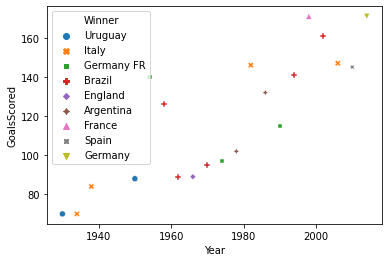

In [35]:
# relação entre os campeões e a quantidade de gols
sns.scatterplot(data=df_wordcups, x='Year',y='GoalsScored', hue='Winner', style='Winner');

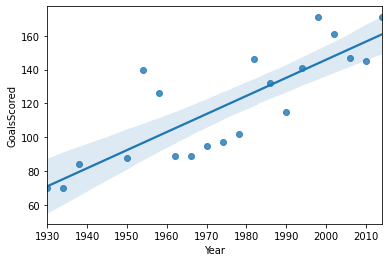

In [41]:
sns.regplot(data=df_wordcups, x='Year', y='GoalsScored');

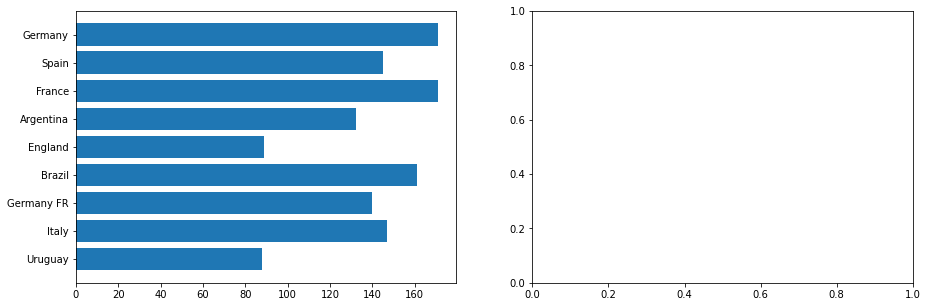

In [38]:
# ranking e evolução dos gols
fig, (ax, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

# campeões do mundo
ax.barh(df_wordcups['Winner'], df_wordcups['GoalsScored'])

plt.show()

(array([2., 4., 2., 1., 1., 1., 2., 4., 0., 3.]),
 array([ 70. ,  80.1,  90.2, 100.3, 110.4, 120.5, 130.6, 140.7, 150.8,
        160.9, 171. ]),
 <a list of 10 Patch objects>)

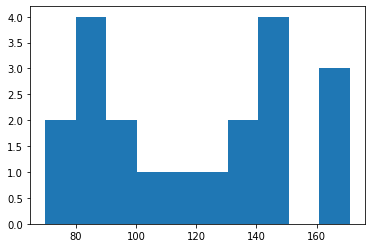

In [39]:
plt.hist(df_wordcups['GoalsScored'],bins=10)

In [40]:
# ranking vencedores
df_wordcups['Winner'].value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
Spain         1
Germany       1
France        1
Name: Winner, dtype: int64